In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from adjustText import adjust_text

In [114]:
# Load your data into a pandas DataFrame
df_data = pd.read_csv('DEG_OE_vs_KD_Cluster3-0.csv')

# Substitute zeros with a very small number. When calculating -log10 of the p-value for plotting RNA-seq data, encountering a p-value of zero can be problematic because log10(0) is undefined. 
# judge = df_data['p_val_adj'] == 0
# df_data['p_val_adj'][judge] = 1e-11

# Calculate -log10 of the adjusted p-value for plotting
df_data['-log10_p_val_adj'] = -np.log10(df_data['p_val_adj'])

# Preview the data
print(df_data.head())

          p_val  avg_log2FC  pct.OE  pct.KD     p_val_adj     gene  \
0  1.340000e-46    1.418161   0.867   0.626  3.090000e-42  Gm42418   
1  5.130000e-25    0.694037   0.940   0.896  1.180000e-20    Srrm2   
2  1.770000e-20    7.730323   0.172   0.000  4.060000e-16  Gm17167   
3  2.670000e-20   -0.526756   0.931   0.974  6.130000e-16    Gria2   
4  1.430000e-18   -0.947191   0.541   0.776  3.280000e-14    Las1l   

   -log10_p_val_adj  
0         41.510042  
1         19.928118  
2         15.391474  
3         15.212540  
4         13.484126  


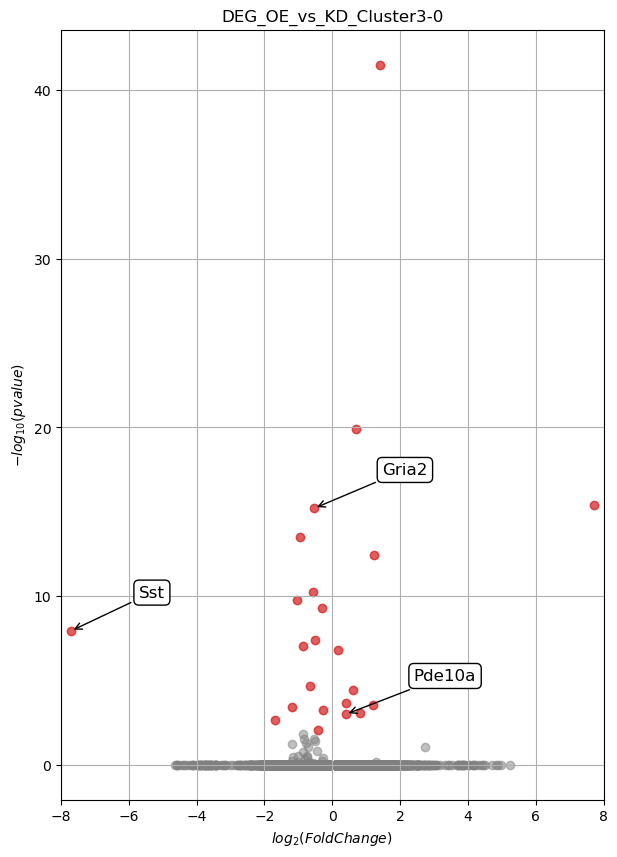

In [115]:
# Create the plot
plt.figure(figsize=(7, 10))

# Scatter plot of all genes
plt.scatter(df_data['avg_log2FC'], df_data['-log10_p_val_adj'], color='grey', alpha=0.5)

# Highlight significant genes (example: adj_p_value < 0.05 and abs(log2_fold_change) > 1)
significant = df_data[(df_data['p_val_adj'] < 0.01)] # & (abs(df_data['avg_log2FC']) > 1)]
plt.scatter(significant['avg_log2FC'], significant['-log10_p_val_adj'], color='red', alpha=0.5)

# Annotate some specific genes
genes_to_annotate = ['Gria2', 'Sst', 'Pde10a']  
for gene in genes_to_annotate:
    gene_data = df_data[df_data['gene'] == gene]
    x = gene_data['avg_log2FC'].values[0]
    y = gene_data['-log10_p_val_adj'].values[0]

    plt.annotate(gene, 
                 xy=(x, y),  # Position of the point
                 xytext=(x+2, y+2),  # Position of the text
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Add labels and title
plt.xlabel('$log_2(Fold Change)$')
plt.ylabel('$-log_{10}(pvalue)$')
plt.grid()
plt.xlim(-8, 8)
title = Path('DEG_OE_vs_KD_Cluster3-0.csv').stem
plt.title(f'{title}')
plt.savefig(f'{title}.png', dpi=300)

# Show the plot
plt.show()

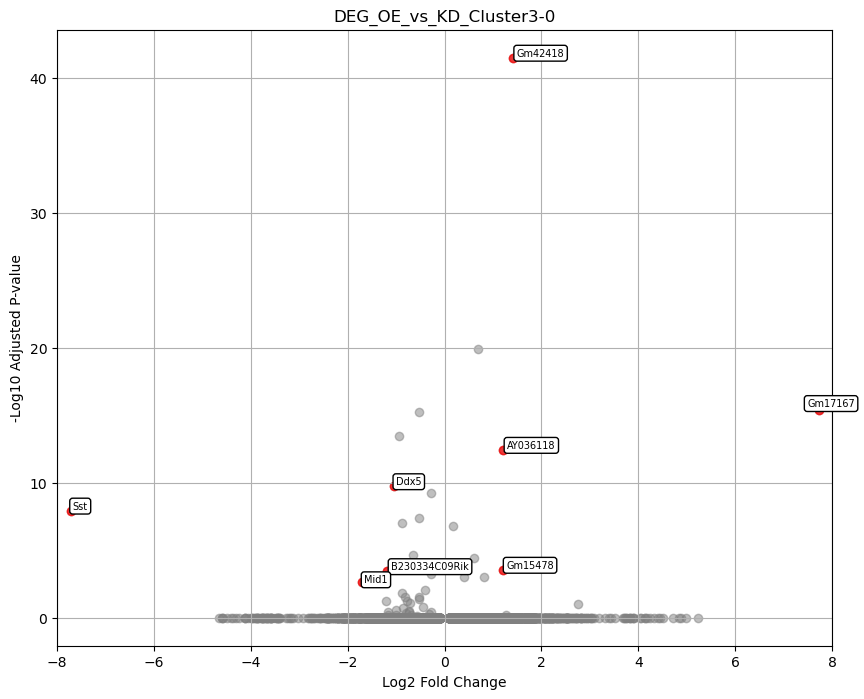

In [116]:
# Calculate -log10 of the adjusted p-value for plotting
df_data['-log10_p_val_adj'] = -np.log10(df_data['p_val_adj'])

# Create the plot
plt.figure(figsize=(10, 8))

# Scatter plot of all genes
plt.scatter(df_data['avg_log2FC'], df_data['-log10_p_val_adj'], color='grey', alpha=0.5)

# Highlight significant genes (example: adj_p_value < 0.05 and abs(log2_fold_change) > 1)
significant = df_data[(df_data['p_val_adj'] < 0.01) & (abs(df_data['avg_log2FC']) > 1)]
plt.scatter(significant['avg_log2FC'], significant['-log10_p_val_adj'], color='red', alpha=0.7)

# Annotate some specific genes
genes_to_annotate = significant['gene']  
texts=[]
for gene in genes_to_annotate:
    gene_data = df_data[df_data['gene'] == gene]
    x = gene_data['avg_log2FC'].values[0]
    y = gene_data['-log10_p_val_adj'].values[0]

    texts.append(
        plt.text(x, y, gene, fontsize=7, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    )

# Adjust the text annotations to avoid overlap and include arrows
adjust_text(texts, 
            only_move={'points':'y', 'text':'y+1'}, 
            arrowprops=dict(arrowstyle='->', color='black'))

# Add labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.grid()
plt.xlim(-8, 8)
title = Path('DEG_OE_vs_KD_Cluster3-0.csv').stem
plt.title(f'{title}')

# Show the plot
plt.show()

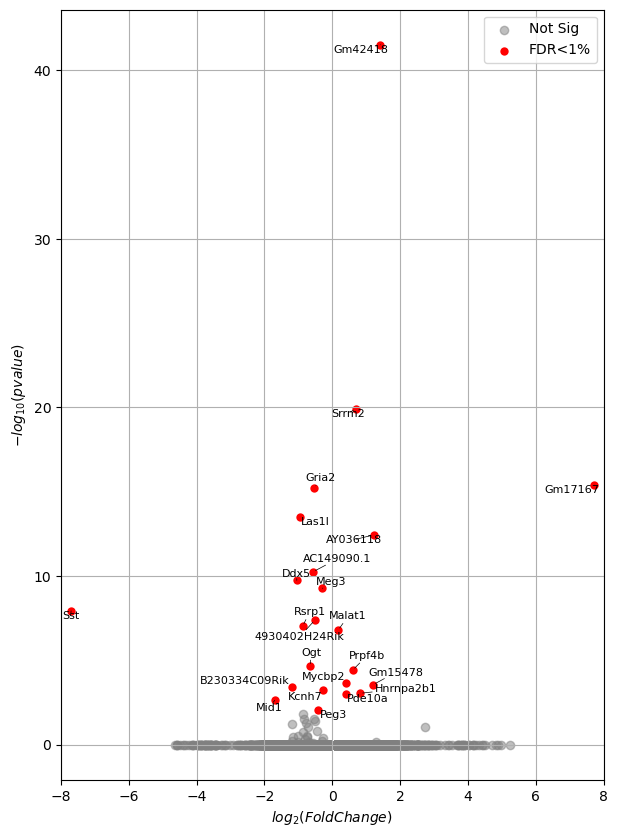

: 

In [117]:
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.01
    xns, yns = df_data['avg_log2FC'][df_data['p_val_adj']>=threshold], -np.log10(df_data['p_val_adj'][df_data['p_val_adj']>=threshold])
    plt.scatter(xns, yns, c='grey', label='Not Sig', alpha=0.5)
    xs, ys = df_data['avg_log2FC'][df_data['p_val_adj']<threshold], -np.log10(df_data['p_val_adj'][df_data['p_val_adj']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<1%')
    texts = []
    for x, y, l in zip(xs, ys, df_data['gene'][df_data['p_val_adj']<threshold]):
        texts.append(plt.text(x, y, l, size=8, ha='center', va='center'))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    plt.grid()
    plt.xlim(-8,8)
    if adjust:
        adjust_text(texts,
                    arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs)
plot_volcano(adjust=True);

In [93]:
# Load the gene mapping data
gene_mapping = pd.read_csv("GeneAnnotation.csv")
gene_mapping = gene_mapping[['OfficialGeneSymbol', 'OfficialGeneName']]
gene_mapping.head()



,OfficialGeneSymbol,OfficialGeneName
0,NaN,NaN
1,NaN,NaN
2,Zfp262,zinc finger protein 262
3,Slc25a27,"solute carrier family 25, member 27"
4,Mrpl45,mitochondrial ribosomal protein L45


In [100]:
merged_data =  pd.merge(df_data, gene_mapping, how='left', left_on = 'gene', right_on = 'OfficialGeneSymbol')
merged_data =  merged_data.drop(columns=['OfficialGeneSymbol'])
print(merged_data)

              p_val  avg_log2FC  pct.KD  pct.Scr     p_val_adj        gene  \
0      4.950000e-61   -1.859956   0.626    0.990  1.140000e-56     Gm42418   
1      5.700000e-44   -2.001578   0.283    0.831  1.310000e-39    AY036118   
2      4.380000e-23   -0.680313   0.896    0.990  1.010000e-18       Srrm2   
3      9.640000e-22   -7.158341   0.000    0.188  2.210000e-17     Gm17167   
4      3.260000e-18   -0.513577   0.943    1.000  7.490000e-14  AC149090.1   
...             ...         ...     ...      ...           ...         ...   
12915  9.990000e-01    0.352157   0.148    0.159  1.000000e+00        Ftl1   
12916  1.000000e+00    0.403449   0.070    0.072  1.000000e+00       Zfp52   
12917  1.000000e+00    0.577659   0.087    0.092  1.000000e+00       Ftsj1   
12918  1.000000e+00    0.990075   0.028    0.029  1.000000e+00      Efcab5   
12919  1.000000e+00    0.833796   0.028    0.029  1.000000e+00     Tmem101   

       -log10_p_val_adj                     OfficialGeneName  


In [92]:
print(merged_data)

              p_val  avg_log2FC  pct.KD  pct.Scr     p_val_adj        gene  \
0      4.950000e-61   -1.859956   0.626    0.990  1.140000e-56     Gm42418   
1      5.700000e-44   -2.001578   0.283    0.831  1.310000e-39    AY036118   
2      4.380000e-23   -0.680313   0.896    0.990  1.010000e-18       Srrm2   
3      9.640000e-22   -7.158341   0.000    0.188  2.210000e-17     Gm17167   
4      3.260000e-18   -0.513577   0.943    1.000  7.490000e-14  AC149090.1   
...             ...         ...     ...      ...           ...         ...   
12921  9.990000e-01    0.352157   0.148    0.159  1.000000e+00        Ftl1   
12922  1.000000e+00    0.403449   0.070    0.072  1.000000e+00       Zfp52   
12923  1.000000e+00    0.577659   0.087    0.092  1.000000e+00       Ftsj1   
12924  1.000000e+00    0.990075   0.028    0.029  1.000000e+00      Efcab5   
12925  1.000000e+00    0.833796   0.028    0.029  1.000000e+00     Tmem101   

       -log10_p_val_adj gene_symbol                     Officia